# ISTx1002 - Prosjekt om måleusikkerhet<a name="title"></a>

* Prosjekte består av 5 oppgaver, der alle spørsmål (1a, 1b,2a,2b,...) teller likt. **Unntak!!** I Oppgave 4 teller de to deloppgavene **doppelt** og **tredoppelt**.

* Arbeidet skal utføres i grupper på 4-6 studenter. Besvarelsen skal leveres i pdf-format.*


* Det blir gitt bokstavkarakter A-F på oppgaven.

## Innlevering

* **Viktig : Vi har utarbeidet et svarark i Word (odt format) som du finner på kursnettstedet:** https://wiki.math.ntnu.no/istx1002/2023h/start#svar_og_innlevering 

* Vennligst fyll inn alle svarene dine i dette dokumentet. 

* **Til slutt må du eksportere innholdet til en PDF og laste det opp i Inspera.**

* **Innlevering som pdf file i Inspera.**

* I noen av spørsmålene vil svaret inkludere formler. Du kan bruke formeleditoren i Word. Hvis du ikke klarer å lage en fin formel, kan du også skrive den for hånd på et stykke papir og ta et bilde som du kopierer inn i rapporten din. Imidlertid, i dette tilfellet, sørg for at håndskriften din er tydelig. Hvis vi ikke kan lese det du skriver, kan vi ikke gi deg poengene.

* **Frist for innlevering 20. november, kl 12.00.**


## Innholdsfortegnelse
* [Bakgrunn](#intro)
* [Oppgave 1) Usikkerhet i estimater og målinger](#oppgave1)
* [Oppgave 2) Standard usikkerhet](#oppgave2)
* [Oppgave 3) Målefunksjoner og feilforplantning](#oppgave3)
* [Oppgave 4) Korrigere for systematiske feil ved kalibrering av måleinstrumenter](#oppgave4)
* [Oppgave 5) Målefeil i lineær regresjon](#oppgave5)

### Bakgrunn <a name="intro"></a>

Virkeligheten har sjelden fasiter og løsningsforslag. De størrelsene vi ønsker å måle vil ofte være beheftet med usikkerhet. Gode og pålitelige resultater krever at målingene er frie for grove og systematiske feil. I tillegg er det viktig at vi regner ut og formidler usikkerheten i måleresultatene våre. I noen situasjoner er usikkerheten til et måleinstrument kjent, men i andre situasjoner må vi selv vurdere og kvantifisere usikkerhet i målingene vi gjør.

Målet for prosjektet er at studentene skal erverve seg kunnskap om usikkerhet og målefeil, utføre usikkerhetsberegninger i gitte målesystemer, sette opp og gjennomføre egne målinger, og formidle usikkerheten i måleresultatene.

In [1]:
# importere pakker og funksjoner vi trenger
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import display, Latex

### Oppgave 1) Usikkerhet i estimater og målinger<a name="oppgave1"></a>

Hverdagen vår er en utømmelig kilde til usikkerhet. Et eksempel kan være usikkerheten knyttet til reisetiden mellom Oslo og Trondheim, se Figur 1. De færreste av oss bruker akkurat 6 timer og 31 minutter hver gang vi kjører mellom Oslo og Trondheim om Østerdalen. Kjennskap til variasjon i føre og trafikale forhold gjør at vi heller beregner å bruke omtrent 7 timer på reisen, og dermed tar høyde for denne usikkerheten. Dette er bare et av mange eksempler på hvordan vi selv tar høyde for usikkerhet knyttet til et estimat, i dette tilfellet den estimerte reisetiden mellom Oslo og Trondheim.

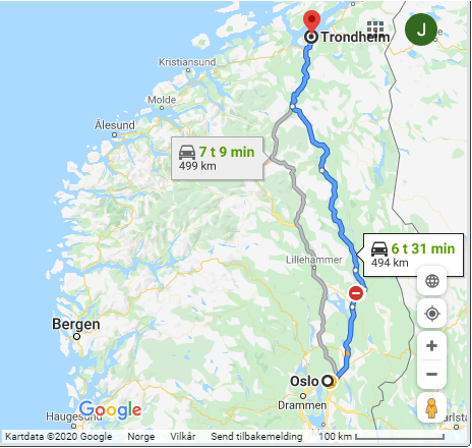

*Figur 1.*

**1a)** Finn tre eksempler på estimater eller målinger som har usikkerhet knyttet til seg. Eksemplene kan være fra dagliglivet eller samfunnet generelt. Skriv maks 2 setninger per eksempel.

**1b)**  Nå skal dere finne et eksempel fra studiet deres, for eksempel en måling dere måtte gjøre i en lab (kjemi, fysik, biologi...). Har dere målt usikkerheten? Har dere tatt gjentatte målinger? Ble usikkerheten tatt i betraktning? Vurder det kritisk nå på etterkant og si om dere hadde gjor noe annet nå, og hva. 

**1c)** Med utgangspunkt i eksemplene fra **1a)**, oppgi et tilnærmet overslag på størrelsen til usikkerheten. Begrunn overslagene. Skriv maks 2 setninger per eksempel.

### Oppgave 2) Standard usikkerhet<a name="oppgave2"></a>

Standard usikkerhet er det estimerte standardavviket i fordelingen til en målestørrelse. Kunnskap om standard usikkerhet i en måling setter oss i stand til å velge passende målemetode og instrument til et oppdrag.

Figur 2 viser tekniske data om en lasaravstandsmåler hentet fra utstyrsprodusenten sin brosjyre om produktet (Leica geosystems, 2017). Fra Figur 2 kan man lese at utstyrsprodusenten oppgir standard usikkerhet til å være $2.0$ millimeter for målinger i intervallet $0.2$ til $40$ meter.

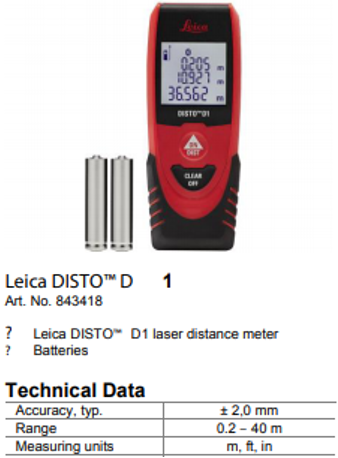

*Figur 2.*

**2a)** Er standard usikkerheten til lasaravstandsmåleren fra Figur 2 en type A-usikkerhet eller en type B-usikkerhet? Begrunn svaret kjapt i maks 2 setninger.

**2b)** Anta at målingene som gjøres med laseravstandsmåleren er normalfordelte og forventningsrette (ingen systematiske feil). La den ukjente størrelsen $L$ representere den avstanden du ønsker å måle, målt i millimeter. Hva er sannsynligheten for at målingen du gjør faller innenfor intervallet $[L – 2.0\text{mm}, L + 2.0\text{mm}]$? Og hva er sannsynligheten for at målingen du gjør faller innenfor intervallet $[L – 4.0\text{mm}, L + 4.0\text{mm}]$? Vis utregningene.

### Oppgave 3) Målefunksjoner og feilforplantning<a name="oppgave3"></a>

Å kjenne til hvordan usikkerhet og feil forplanter seg i et måleopplegg, vil ofte være svært viktig for å få et pålitelig resultat. Å ta høyde for feilforplantning når man velger instrument og framgangsmåte for et måleopplegg kan ofte være enklere sagt enn gjort, og krever i mange situasjoner både kunnskap og erfaring. En typisk fremgangsmåte er å identifisere alle kilder til usikkerhet i et usikkerhetsbudsjett. Hver del-måling som inngår i måleopplegget representeres som en stokastisk variabel med et visst standardavvik (standard usikkerhet), og selve målingen er en funksjon av variablene.

Med utgangspunkt i lasaravstandsmåleren fra Figur 2 vil vi finne en mer nøyaktig lengde på en avstand $D$ som er kjent til å være omtrent $50\text{m}$ til $55\text{m}$ lang. Siden måleren har en rekkevidde på $40\text{m}$, skal avstanden måles i to omganger som vist i Figur 3.

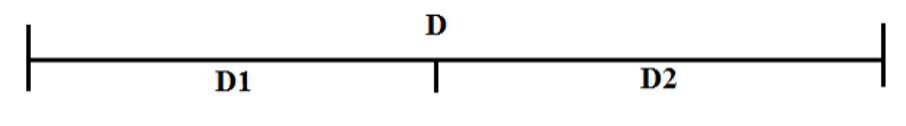

*Figur 3. Avstanden $D$ skal måles ved å summere målinger av de to avstandene $D1$ og $D2$.*

**3a)** Finn målefunksjonen til avstanden $D$.

**3b)** Anta at de to målte avstandene $D1$ og $D2$ er uavhengige. Finn den kombinerte standard usikkerheten til avstanden $D$.



**3c)** Vi skal nå bruke lasaravstandsmåleren til å finne arealet $A$ av et rektangel som har ukjent lengde $l$, og ukjent bredde $b$ (Figur 4). Anta for enkelthets skyld at lengde og bredde er mindre enn 40m. Sett opp målefunksjonen for arealet $A$, finn følsomhetsfaktorene til de to del-målingene og finn et tilnærmet utrykk for den kombinerte standard usikkerheten til målingen av areal. Uttrykket skal inneholde $l$, $b$, $\sigma_l$ og $\sigma_b$, der $\sigma_l$ og $\sigma_b$ er standard usikkerhet i målinger av lengde og bredde, henholdsvis. 

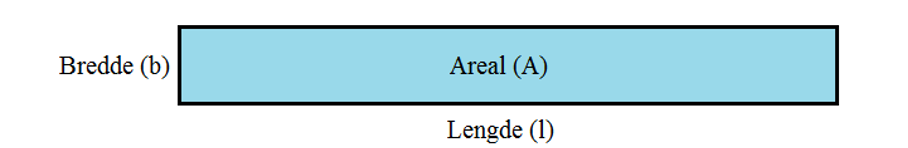

*Figur 4. Eksempel på et langt og smalt rektangel, der lengden er vesentlig større enn bredden.* 

**3d)** I et rektangel som er langt og smalt, som i Figur 4, vil usikkerheten i lengden eller bredden gi størst påvirkning på den kombinerte standard usikkerheten til arealet til rektangelet? Begrunn svaret i maks 2 setninger.

**3e)** For rektangelet som er vist i Figur 4, anta $b = 2\text{m}, l = 20\text{m}$. Finn den kombinerte standard usikkerheten for arealet målt med lasaravstandsmåleren fra Figur 2.

### Oppgave 4) Korrigere for systematiske feil ved kalibrering av måleinstrumenter<a name="oppgave4"></a>

Husk: I denen oppgaven teller a) doppelt og b) tre-doppelt så mye som deloppgavene i de andre oppgavene, fordi de er mer tidskrevende.

I oppgave 2 og 3 har vi antatt at målingene som gjøres er forventningsrette, og at usikkerheten i målingene skyldes tilfeldig variasjon. Men det er lite hjelp i en svært presis lasaravstandsmåler dersom den konsekvent måler $5\text{cm}$ for kort. Eller om den gir nøyaktige målinger på kort avstand, men at en systematisk feil oppstår ved måling av lengre avstander. Det er heller ikke mye hjelp i en nøyaktig og presis lasaravstandsmåler dersom den som utfører målingen konsekvent leser av feil verdi. Ved å kjenne til kilder for systematiske feil, kan man korrigere for disse og dermed få forventningsrette estimat.

I denne oppgaven skal gruppa bruke sine egne steg som måleinstrumenter for avstand (i meter), og deretter beregne en avstand.

**4a)** Ettersom de færreste har en steglengde på nøyaktig 1m må hver gruppedeltakers steglengde kalibreres mot en meterstokk eller en annen gjenstand med kjent lengde. Mål opp steglengde 10 ganger for hvert gruppemedlem og regn ut gjennomsnitt og standardavvik for hver person.

***

**4b)** Nå skal dere måle en avstand. Velg en rute mellom to punkter, helst et godt stykke. Hvert gruppemedlem går så ruten én etter én, og teller antall skritt (med en stegteller eller manuell telling). Finn et estimat på lengden til ruta dere valgte i meter, basert på på de kalibrerte steglengdene deres og antall steg. Oppgi selve estimatet og usikkerheten i estimatet. Vis utregninger.

### Oppgave 5) Målefeil i lineær regresjon<a name="oppgave5"></a>

Vi skal nå se på sammenhengen mellom reaksjonstid med den dominante hånd (altså høyre hånd dersom man er høyrehendt) og reaksjonstid med den ikke-dominante hånda (venstre hånd dersom man er høyrehendt, og omvent). Datasettet ble laget ved at studenter i et tidligere statistikkemne skrev inn tidene sine på reaksjonstidtesten inn i et regneark. Hver deltaker målte reaksjonstiden med dominant hånd $5$ ganger, og $1$ gang med ikke-dominant hånd. Under laster vi inn datasettet. 

In [2]:
# Read data from Google Sheets URL
the_URL = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQFgYX1QhF9-UXep22XmPow1ZK5nbFHix9nkQIa0DzqUhPtZRxH1HtY-hsno32zDiuIHiLb2Hvphk1L/pub?gid=1188775314&single=true&output=csv"
class_RTs = pd.read_csv(the_URL)

# Rename columns
class_RTs.columns = ["Timestamp", "ID", "Gender", "Pref_Reaction_time_1",
                     "Verbal_memory_score", "Number_memory_score",
                     "Visual_memory_score",
                     "Weight_kgs", "Handed", "Nonpref_Reactiontime",
                     "Pref_Reaction_time_2", "Pref_Reaction_time_3",
                     "Pref_Reaction_time_4", "Pref_Reaction_time_5",
                     "Pref_Reactiontime", "selected_number"]

dd = class_RTs.copy()

Det kan tenkes at målingene av reaksjonstid *påvirkes av målefeil*. Heldigvis kan vi ta høyde for dette siden vi har gjentatte målinger av reaksjonstid med foretrukken hånd. 

Under har vi laget to lineære regresjonsmodeller der vi undersøker sammenhengen mellom reaksjonstid i dominant og ikke-dominant hånd. Begge modellene har reaksjonstid med ikke-dominant hånd som respons ($y$). Den første modellen bruker gjennomsnittet av de fem målingene med dominant hånd som kovariat $x$, mens den andre modellen bruker kun måling nummer 3 som kovariat.

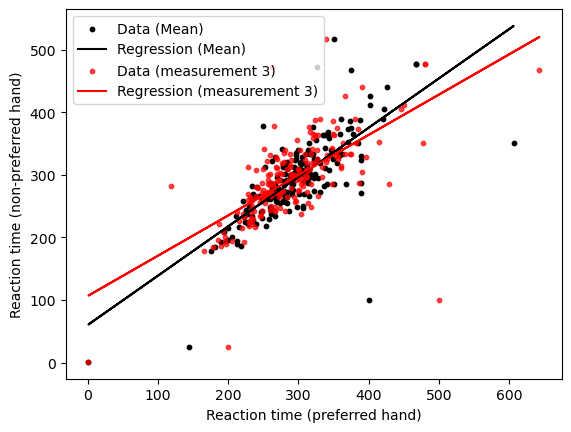

In [3]:
# Calculate the mean of Pref_Reaction_time columns
dd["Pref_Reactiontime_mean"] = dd[["Pref_Reaction_time_1",
                                   "Pref_Reaction_time_2",
                                   "Pref_Reaction_time_3",
                                   "Pref_Reaction_time_4",
                                   "Pref_Reaction_time_5"]].mean(axis=1)

# Fit a linear regression model using the mean of the five measurements as the covariate
X_mean = dd["Pref_Reactiontime_mean"]
X_mean = sm.add_constant(X_mean)
y = dd["Nonpref_Reactiontime"]
model_mean = sm.OLS(y, X_mean).fit()
# Fit another model using one only one of the measurements as the covariate
X_3 = dd["Pref_Reaction_time_3"]
X_3 = sm.add_constant(X_3)
model_3 = sm.OLS(y, X_3).fit()

# Scatter plot and regression lines
plt.scatter(dd["Pref_Reactiontime_mean"], dd["Nonpref_Reactiontime"], color = "black", s=10, label = 'Data (Mean)')
plt.plot(dd["Pref_Reactiontime_mean"], model_mean.predict(X_mean), color="black", label = 'Regression (Mean)')
plt.scatter(dd["Pref_Reaction_time_3"], dd["Nonpref_Reactiontime"], color = "red", s=10, alpha = 0.7, label = 'Data (measurement 3)')
plt.plot(dd["Pref_Reaction_time_3"], model_3.predict(X_3), color="red", label = 'Regression (measurement 3)')
plt.xlabel("Reaction time (preferred hand)")
plt.ylabel("Reaction time (non-preferred hand)")
plt.legend()
plt.show()

**5a)** Vi har plottet regresjonslinjene til de to modellene over. Hvordan vil du forklare forskjellen i stigningstallene til de to regresjonslinjene? Svar med maks 3 setninger.

***

Siden vi har gjentatte målinger av reaksjonstid med dominant hånd kan vi finne et estimat på målefeilen i denne kovariaten med formelen under (det er ikke pensum å huske/forstå denne formelen):

$$
\hat \sigma^2_u = \frac{\sum_{i=1}^N \sum_{j=1}^{k_i} \left( x_{ij} - \bar x_{i} \right)^2 }{\sum_{i=1}^N \left(k_i - 1\right) }\ ,
$$

der $N$ er antall deltakere, $k_i$ er antall målinger av deltaker $i$ (her $5$ for alle deltakere), $x_{ij}$ er måling nummer $j$ av deltaker $i$ og $\bar x_{i}$ er gjennomsnittet av målingene av deltaker $i$.

Vi har implementert formelen under for å få et estimat for usikkerhet/feilvariansen $\sigma_u^2$ i en enkeltmåling av reaksjonstiden.

In [4]:
# Estimate error variance
dd2 = dd[["Pref_Reaction_time_1",
          "Pref_Reaction_time_2",
          "Pref_Reaction_time_3",
          "Pref_Reaction_time_4",
          "Pref_Reaction_time_5"]]

error_var = ((dd2.sub(dd2.mean(axis=1), axis=0)**2).sum().sum() / (len(dd) * 4))

display(Latex(f"Estimert målefeilvarians i enkeltmåling: $\hat \sigma^2_u = {error_var:.3f}$"))

<IPython.core.display.Latex object>

**5b)** Vi jobber nå videre med modellen som har gjennomsnittet av fem målinger som kovariat. Hva vil estimatet på målefeilvariansen i denne kovariaten være, dersom estimatet $\hat \sigma^2_u$ er målefeilvariansen i en enkeltmåling? Du må fylle inn riktig kode her:

In [5]:
error_var_mean = 0 # Fyll inn kode selv

display(Latex(f"Målefeilvarians gjennomsnittet av målinger: $\hat \sigma^2_u = {error_var_mean:.3f}$"))

<IPython.core.display.Latex object>

***

**5c)** I forelesningene lærte vi en fremgangsmåte vi kan bruke for å ta høyde for målefeil i kovariater i lineær regresjon ved hjelp av en såkalt "attenueringsfaktor" $\lambda$, som sier hvor mye stigningstallet blir redusert pga målefeil. Bruk denne metoden til å finne et estimat for den "korrekte" koeffisienten $\beta_x$. Start med estimaten du får fra modellen med gjennomsnittet av målingene som kovariat (vi kan kalle den for $\hat\beta_w$ eller $\hat\beta_x^\star$), ved å gjøre passende endringer i koden under.

In [6]:
# Variance in measurements of the covariate
total_variance = np.var(dd["Pref_Reactiontime_mean"], ddof=1)
display(Latex(f"Varians av målingene av kovariaten:  $\sigma^2_w = {total_variance:.3f}$"))

attenuation_factor = 0 # Fyll inn kode selv
beta_corrected = 0 # Fyll inn kode selv

display(Latex(f"Ujustert estimat: $\hat \\beta_w = {model_mean.params[1]:.3f}$"))
display(Latex(f"Attenueringsfaktor: $\lambda = {attenuation_factor:.3f}$"))
display(Latex(f"Justert estimat: $\hat \\beta_x = {beta_corrected:.3f}$"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

***

**5d)** En annen, mer heuristisk metode vi har lært som tar høyde for målefeil i kovariatene er "Simex," eller "simuleringsekstrapolering." Under har vi implementert Simex-algoritmen for reaksjonstid-modellen, fortsatt med gjennomsnittet av de fem målingene som kovariat. Forklar kort hvordan Simex fungerer (maks 5 setninger). Gjør også den nødvendige endringen i koden for å finne simex-estimatet på $\beta_x$.
**Obs!** $\lambda$ i Simex proseduren er en annen enn atenueringsfaktoren over.

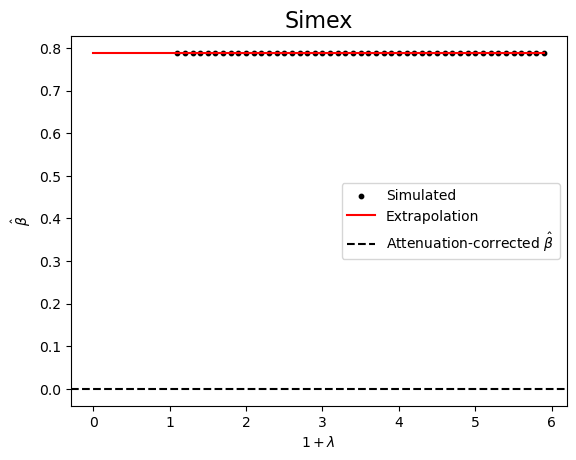

In [7]:
# Simex analysis
np.random.seed(123)
lambda_max = 5
lambdas = np.arange(0.1, lambda_max, 0.1)
betas = np.empty(len(lambdas))
num_reps = 100
for l in range(len(lambdas)):
    l_betas = np.empty(num_reps)
    for i in range(num_reps):
        error_vector = np.random.normal(size=len(dd)) # draw from standard normal
        X_sim = X_mean.copy()
        X_sim["Pref_Reactiontime_mean"] += np.sqrt(lambdas[l] * error_var_mean) * error_vector # add more measurement error
        model_sim = sm.OLS(y, X_sim).fit() # fit model
        l_betas[i] = model_sim.params[1] # extract beta
    betas[l] = l_betas.mean() # mean of betas for a given lambda

# Fit extrapolation model (quadratic regression)
data = np.column_stack((np.ones(len(lambdas)), lambdas, lambdas**2))
X_extrap = pd.DataFrame(data, columns=['c', 'b', 'a'])
extrapolation_model = sm.OLS(betas, X_extrap).fit()

# Make extrapolation
ext_lambda = np.arange(-1, lambda_max, 0.1)
ext_X = pd.DataFrame(np.column_stack((np.ones(len(ext_lambda)), ext_lambda, ext_lambda**2)), columns=['c', 'b', 'a'])
extrapolation = extrapolation_model.predict(ext_X)

plt.scatter(X_extrap['b'] + 1, betas, label='Simulated', color='black', s=10)
# plt.scatter(0, extrapolation[0], label='Simex estimate', color='green', s=10)
plt.plot(ext_X['b'] + 1, extrapolation, label='Extrapolation', color='red')
plt.axhline(y=beta_corrected, color='black', linestyle='--', label=r'Attenuation-corrected $\hat \beta$')
plt.xlabel(r'$1 + \lambda$')
plt.ylabel(r'$\hat \beta$')
plt.legend()
plt.title('Simex',fontsize=16)
plt.show()

In [8]:
beta_simex = 0 # Fyll inn kode kode
display(Latex(f"Simex-estimat: $\hat \\beta_x = {beta_simex:.3f}$"))

<IPython.core.display.Latex object>

***

**5e)** Under har vi plottet 3 regresjonslinjer for modellen med gjennomsnittet av fem målinger som kovariat. Dersom dere har gjort oppgavene **5c)** og **5d)** riktig (altså funnet riktige verdier for `beta_corrected` og `beta_simex`) vil den blå og den oransje linja ligge svært nærme hverandre. I tillegg vil begge ha et noe høyere stigningstall enn den svarte linja, som viser regresjon uten korrektur av målefeil. Hvordan vil du forklare forskjellen/likheten i stigningstallene mellom de tre linjene? Svar med maks 4 setninger.

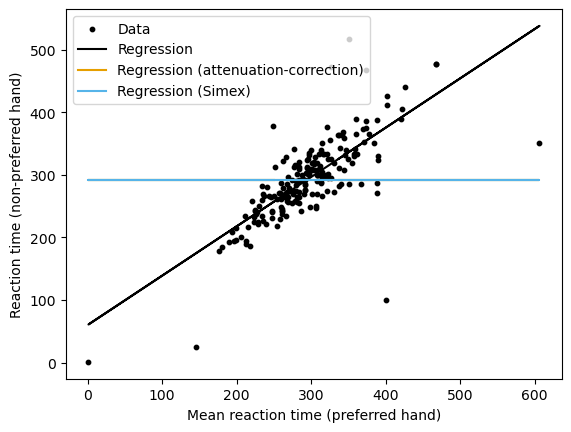

In [9]:
# Scatter plot and regression lines

model_att = sm.OLS(y, X_mean).fit()
# Overwrite estimates
model_att.params[0] = np.mean(y) - np.mean(X_mean['Pref_Reactiontime_mean']) * beta_corrected
model_att.params[1] = beta_corrected

model_simex = sm.OLS(y, X_mean).fit()
# Overwrite estimates
model_simex.params[0] = np.mean(y) - np.mean(X_mean['Pref_Reactiontime_mean']) * beta_simex
model_simex.params[1] = beta_simex

plt.scatter(dd["Pref_Reactiontime_mean"], dd["Nonpref_Reactiontime"], color = "black", s=10, label = 'Data')
plt.plot(dd["Pref_Reactiontime_mean"], model_mean.predict(X_mean), color="black", label = 'Regression')
plt.plot(dd["Pref_Reactiontime_mean"], model_att.predict(X_mean), color="#E69F00", label = 'Regression (attenuation-correction)')
plt.plot(dd["Pref_Reactiontime_mean"], model_simex.predict(X_mean), color="#56B4E9", label = 'Regression (Simex)')
plt.xlabel("Mean reaction time (preferred hand)")
plt.ylabel("Reaction time (non-preferred hand)")
plt.legend(loc = 'upper left')
plt.show()

[Til toppen.](#title)